In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\nbmal\AppData\Local\Temp\ipykernel_29560\930725367.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [13]:
# View all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station
print(Station)

<class 'sqlalchemy.ext.automap.station'>


In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
print(most_recent_date)

2017-08-23


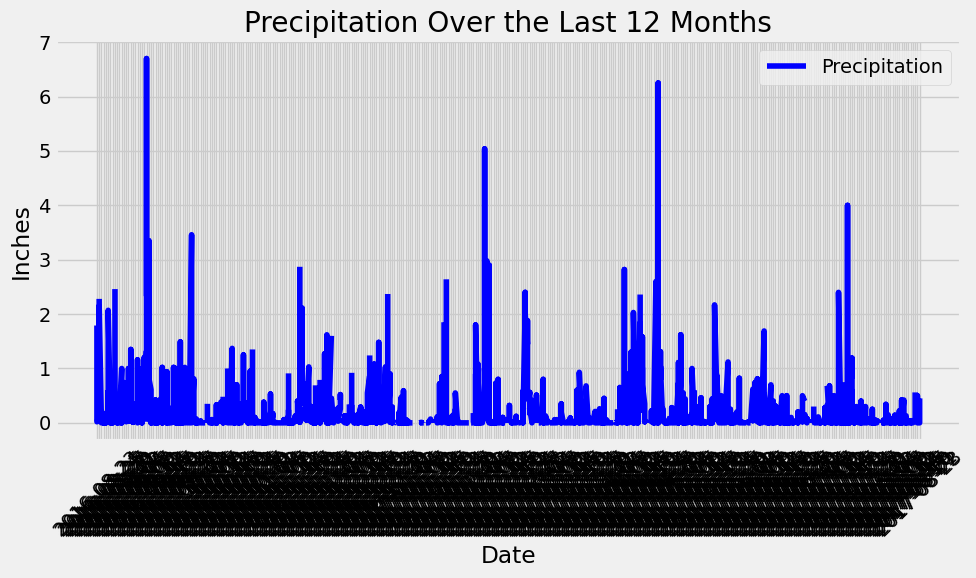

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
one_year_ago = one_year_ago.strftime('%Y-%m-%d') 
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precip_df.set_index('date', inplace=True)
precip_df = precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(precip_df.index, precip_df['precipitation'], color='b', label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Over the Last 12 Months')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).first()[0]
total_stations

9

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]

lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()[0]

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()[0]

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()[0]

lowest_temp, highest_temp, avg_temp

(54.0, 85.0, 71.66378066378067)

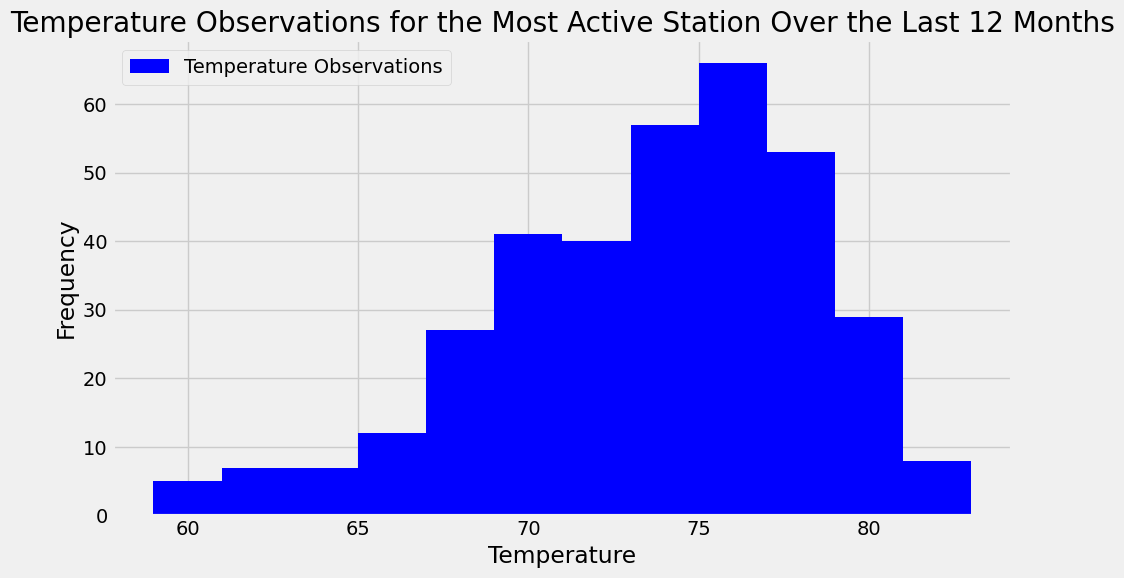

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a DataFrame
temp_obs_df = pd.DataFrame(temp_obs, columns=['date', 'temperature'])

# Set the index to the date column
temp_obs_df.set_index('date', inplace=True)

# Sort the DataFrame by date
temp_obs_df = temp_obs_df.sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(temp_obs_df['temperature'], bins=12, color='b', label='Temperature Observations')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for the Most Active Station Over the Last 12 Months')
plt.legend()
plt.tight_layout()
plt.show()


# Close Session

In [32]:
# Close Session
session.close()